In [62]:
!pip install -U d2l

  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\bloodyprof\\anaconda3\\envs\\dl\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:


In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [43]:
n_train = 50 # No. of training examples
x_train, _ = torch.sort(torch.rand(n_train) * 5)  

In [51]:
x_train.shape

torch.Size([50])

In [45]:
def f(x):
    return 2 * torch.sin(x) + x**0.8

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,)) # Training outputs
x_test = torch.arange(0, 5, 0.1) # Testing examples
y_truth = f(x_test) # Ground-truth outputs for the testing examples
n_test = len(x_test) # No. of testing examples
n_test

50

In [46]:
def plot_kernel_reg(y_hat):
    plt.plot(x_test, y_truth)
    plt.plot(x_test, y_hat)
    plt.plot(x_train, y_train, 'o', alpha=0.5);


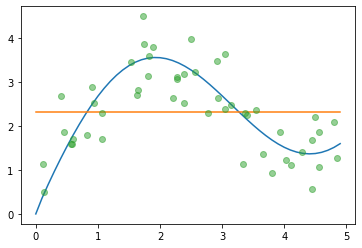

In [55]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)
plot_kernel_reg(y_hat)

In [56]:
y_hat

tensor([2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140,
        2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140,
        2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140,
        2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140,
        2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140, 2.3140,
        2.3140, 2.3140, 2.3140, 2.3140, 2.3140])

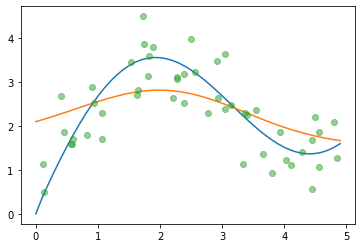

In [59]:
# Shape of `X_repeat`: (`n_test`, `n_train`), where each row contains the
# same testing inputs (i.e., same queries)
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))
# Note that `x_train` contains the keys. Shape of `attention_weights`:
# (`n_test`, `n_train`), where each row contains attention weights to be
# assigned among the values (`y_train`) given each query
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# Each element of `y_hat` is weighted average of values, where weights are
# attention weights
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

### Batch Matrix Multiplication

In [64]:
x =  torch.ones(3,5,3)
y = torch.ones(3,3,6)
torch.bmm(x,y).shape

torch.Size([3, 5, 6])

In [ ]:
weights = torch.ones((2, 10)) * 0.1
values = torch.arange(20.0).reshape((2, 10))
torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))